In [1]:
from keras import Model, Input, Sequential, regularizers
from keras.layers import Activation, Dense, LSTM, Embedding
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from scipy.spatial import distance
from sklearn import datasets
from keras import backend as K
import scipy as sp
import sklearn.metrics
%matplotlib inline

Using TensorFlow backend.


In [2]:
dataset = pd.read_csv('data_1/fosagro/data/122-1 P2O5 в концентрате 1 оч.csv', parse_dates=True, index_col='date', )

In [3]:
target = '122-1 P2O5 в концентрате 1 оч'

In [4]:
dataset.dropna(inplace=True)

In [6]:
dataset.std()

122-1 P2O5 в концентрате 1 оч    0.231181
dtype: float64

In [2]:
stand = StandardScaler()

In [ ]:
stand.fit_transform(pd.DataFrame({'x':x, 'y':y}))[:,1].std()

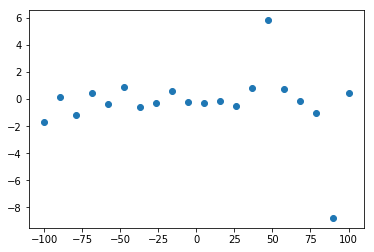

In [87]:
# np.random.seed(1)
n = 20
outlier_ratio = 0.2

x = np.linspace(-100,100,n)
y = np.random.normal(0,0.5,size=round(n*(1-outlier_ratio)))
y = np.append(y,np.random.normal(0,10,size=round(n*outlier_ratio)))
np.random.shuffle(y)
# plt.scatter(x,stand.fit_transform(np.abs(y.reshape(-1, 1))), s=2)
plt.scatter(x, y)

In [89]:
y_pred = y + np.random.normal(0,1.5,size=n)
# y_preds = [y + np.random.normal(0,2,size=n) for i in range(n+1)]
# plt.scatter(x,stand.fit_transform(np.abs(y_pred.reshape(-1, 1))), s=2)

In [92]:
df = pd.DataFrame({'y':y, 'y_pred':y_pred})
# df = pd.DataFrame(np.append([y],y_preds, 0))
V = df.cov()
VI = np.linalg.inv(np.atleast_2d(V))

In [46]:
V = np.cov(y)
VI = np.linalg.inv(np.atleast_2d(V))
V

array(10.33205272)

In [107]:
results = distance.cdist(np.atleast_2d(df['y']).reshape(-1,1), np.atleast_2d(df['y_pred']).reshape(-1,1), 'mahalanobis', VI=VI)
results = np.diag(results)
# plt.scatter(x, results[0,:], s=2)
results

array([2.52564105, 0.63721404, 1.19073643, 2.32650197, 1.08303644,
       0.3994859 , 1.26914421, 1.63382763, 1.5076816 , 0.8365718 ,
       1.55052529, 0.87998987, 0.96726018, 0.00429138, 0.62041017,
       0.20316753, 1.62951513, 0.74495021, 0.89932178, 1.22962095])

In [109]:
distance.mahalanobis(df['y'].iloc[:], df['y_pred'].iloc[:], VI)

ValueError: shapes (20,) and (2,2) not aligned: 20 (dim 0) != 2 (dim 0)

In [72]:
mean_squared_error(df.iloc[0], df.iloc[1])

6.374765230267206

In [83]:
sklearn.metrics.mean_absolute_error(df.iloc[0], df.iloc[1])

2.0449506671562547

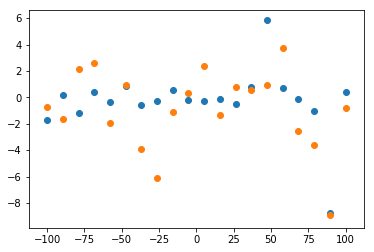

In [80]:
plt.scatter(x, df.iloc[0])
plt.scatter(x, df.iloc[1])

# Research

In [834]:
# np.random.seed(2)
shape = (10,)

x = np.random.randint(0,50,shape)
y = np.random.randint(20,50,shape)
z = np.random.randint(0,50,shape)

# x = np.append(x,[[5]],0)
# y = np.append(y,[[5]],0)


df = pd.DataFrame({'x':x})
V = df.cov()
VI = np.linalg.inv(V)

# delta = x-y
# np.dot(delta, VI)
# m = np.dot(np.dot(delta, VI), delta)


# # results = np.diag(results)
# print (results)

3.7121906507791023

In [856]:
distance.mahalanobis(np.array(df.iloc[0]), np.array(df.iloc[1]), VI)

1.9267046091134734

In [871]:
results = distance.cdist(df, df,'mahalanobis', VI=VI)
results

array([[ 0.        ,  8.35849001,  1.95031433, 10.86603701,  1.11446533,
         1.11446533,  0.835849  ,  6.686792  ,  1.11446533,  4.73647767],
       [ 8.35849001,  0.        ,  6.40817567,  2.507547  ,  9.47295534,
         9.47295534,  9.19433901,  1.671698  ,  7.24402467,  3.62201234],
       [ 1.95031433,  6.40817567,  0.        ,  8.91572267,  3.06477967,
         3.06477967,  2.78616334,  4.73647767,  0.835849  ,  2.78616334],
       [10.86603701,  2.507547  ,  8.91572267,  0.        , 11.98050234,
        11.98050234, 11.70188601,  4.179245  ,  9.75157167,  6.12955934],
       [ 1.11446533,  9.47295534,  3.06477967, 11.98050234,  0.        ,
         0.        ,  0.27861633,  7.80125734,  2.22893067,  5.850943  ],
       [ 1.11446533,  9.47295534,  3.06477967, 11.98050234,  0.        ,
         0.        ,  0.27861633,  7.80125734,  2.22893067,  5.850943  ],
       [ 0.835849  ,  9.19433901,  2.78616334, 11.70188601,  0.27861633,
         0.27861633,  0.        ,  7.52264101

In [532]:
def cov(a, b):
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    sum_ = ((a - a_mean) * (b - b_mean)).sum()

    return sum_/(len(a)-1)

In [346]:
x = np.array([[[1,2,3,4,5],
               [5,6,7,8,5],
               [5,6,7,8,5]],
              [[11,22,23,24,5],
               [25,26,27,28,5],
               [5,6,7,8,5]]])
i,j,k = x.shape

xx = x.reshape(i,j*k).T


y = np.array([[[31,32,33,34,5],
               [35,36,37,38,5],
               [5,6,7,8,5]],
              [[41,42,43,44,5],
               [45,46,47,48,5],
               [5,6,7,8,5]]])


yy = y.reshape(i,j*k).T

results =  distance.cdist(xx,yy,'mahalanobis')
results = np.diag(results)
results

array([2.28765854, 2.75165028, 2.75165028, 2.75165028, 0.        ,
       2.75165028, 2.75165028, 2.75165028, 2.75165028, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [ ]:
X = np.vstack([xx,yy])
V = np.cov(X.T)
VI = np.linalg.inv(V)
delta = x - y
np.diag(np.sqrt(np.dot(np.dot(delta,VI),delta.T)))

## Показ

In [19]:
def scale_ax(ax):
    xlim = np.array(ax.get_xlim())
    ylim = np.array(ax.get_ylim())
    
    c = max(abs(xlim[0]-xlim[1]), abs(ylim[0]-ylim[1]))/2
    ax.set_xlim((xlim.mean()-c, xlim.mean()+c))
    ax.set_ylim((ylim.mean()-c, ylim.mean()+c))
    return ax

In [4]:
n = 5000
x = np.random.normal(10,4,n)
y = np.random.normal(200,1.5,n)-x
df = pd.DataFrame({'Высота':y, 'Температура':x})
df.head()

,Высота,Температура
0,197.545360,5.052385
1,184.444329,17.394505
2,184.483221,14.532042
3,194.415242,7.971837
4,188.322800,11.560915


In [5]:
df.corr()

,Высота,Температура
Высота,1.00000,-0.93806
Температура,-0.93806,1.00000


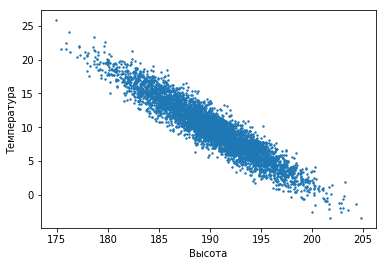

In [6]:
df.plot('Высота', 'Температура', 'scatter', s=2)

## Добавим выброс

In [62]:
mean = [df['Высота'].mean(), df['Температура'].mean()]

In [72]:
outlier = [192, 14]

In [73]:
# Посчитаем Евклидово расстояние от выброса до центра

euc_dist_outlier = distance.euclidean(outlier, mean)
euc_dist_outlier

4.488370097108553

In [86]:
# Найдем точку из датасета с таким же расстоянием до центра
dists = abs(distance.cdist([mean], df).flatten() - euc_dist_outlier)
point_idx = pd.DataFrame(dists).sort_values(0).index[0]
point = df.loc[[point_idx]]
point

,Высота,Температура
1709,186.997478,13.282776


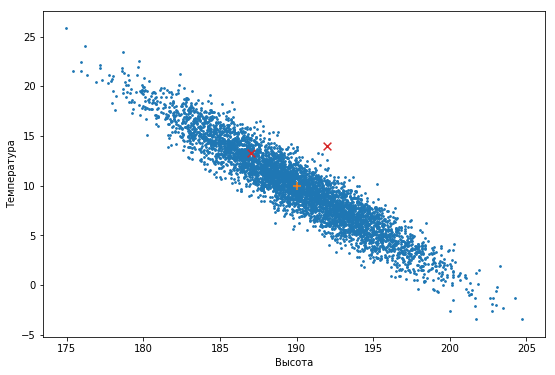

In [87]:
fig, ax = plt.subplots(1,1, figsize=(9,6))
df.plot('Высота', 'Температура', 'scatter', s=3, ax=ax)
ax.scatter(mean[0], mean[1], s=60, c='C1', marker='+')
ax.scatter(df['Высота'].loc[point_idx], df['Температура'].loc[point_idx], s=60, c='C3', marker='x')
ax.scatter(outlier[0], outlier[1], s=60, c='C3', marker='x')
scale_plot(ax)

# ax.set_xlim(188,198)
# fig.savefig('mahal_1')

In [89]:
# Посчитаем расстояние Махаланобиса от выброса до центра
V = df.cov()
VI = np.linalg.inv(V)

mal_dist_outlier = distance.mahalanobis(outlier, mean, VI)
print(mal_dist_outlier)
mal_dist_point = distance.mahalanobis(point, mean, VI)
mal_dist_point

4.139073327019308


0.8391891304573429

In [146]:
dists_mal = abs(distance.cdist(df, [mean], 'mahalanobis', VI)-mal_dist_outlier)
dists_mal = pd.DataFrame(dists_mal).sort_values(0)
radius_mal_1 = df.loc[dists_mal.iloc[:40].index]

In [147]:
dists_mal_2 = abs(distance.cdist(df, [mean], 'mahalanobis', VI)-mal_dist_point)
dists_mal_2 = pd.DataFrame(dists_mal_2).sort_values(0)
radius_mal_2 = df.loc[dists_mal_2.iloc[:40].index]

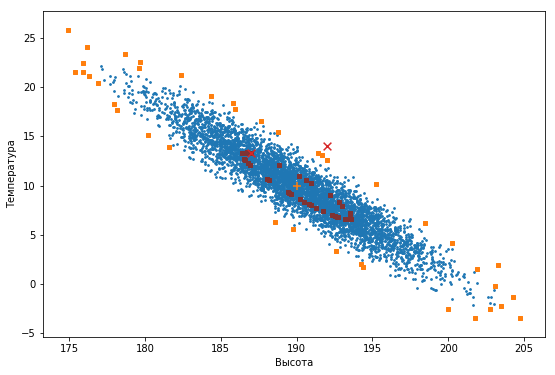

In [169]:
fig, ax = plt.subplots(1,1, figsize=(9,6))

df.plot('Высота', 'Температура', 'scatter', s=3, ax=ax)

ax.scatter(radius_mal_1['Высота'], radius_mal_1['Температура'], c='C1', s=20, marker='s')
ax.scatter(radius_mal_2['Высота'], radius_mal_2['Температура'], c=(0.5,0.2,0.2), s=20, marker='s')

ax.scatter(mean[0], mean[1], s=60, c='C1', marker='+')
ax.scatter(df['Высота'].loc[point_idx], df['Температура'].loc[point_idx], s=60, c='C3', marker='x')
ax.scatter(outlier[0], outlier[1], s=60, c='C3', marker='x')

scale_plot(ax)